In [2]:
def addAllantoinMetabolism(backup):
    model = backup.copy()
    ############
    # Nino-Gonzalez et al 2019
    # Chen et al 2006
    # Ritzel et al 2001
    # Takagi et al 2018
    met1 = Metabolite("S_ALLANTOIN_c",name="S-ALLANTOIN:(S)-(+)-allantoin",
                      formula="C4H6N4O3",compartment="c",
                      charge=0)
    amet1 = Metabolite("aS_ALLANTOIN_c",name="S-ALLANTOIN:(S)-(+)-allantoin",
                      formula="C4H5N4O3",compartment="c",
                      charge=-1)

    rxn1 = Reaction("Allantoin_tx",name="Allantoin uptake")
    rxn1.add_metabolites({model.metabolites.PROTON_e:-1,
                          model.metabolites.PROTON_c:1,met1:0.78,amet1:0.22})
    rxn1.gene_reaction_rule='Glyma.15G066400'
    rxn1.lower_bound = 0
    rxn1.upper_bound = 1000
    ##########
    met2 = Metabolite("S_ALLANTOIN_r",name="(S)-(+)-allantoin",
                      formula="C4H6N4O3",compartment="r",
                      charge=0)
    amet2 = Metabolite("aS_ALLANTOIN_r",name="(S)-(+)-allantoin",
                      formula="C4H5N4O3",compartment="r",
                      charge=-1)


    proton_R = model.metabolites.PROTON_c.copy()
    proton_R.id = "PROTON_r"
    proton_R.compartment = "r"
    rxnProton = Reaction("PROTON_rc",name="ER proton exchange")
    rxnProton.add_metabolites({proton_R:-1,model.metabolites.PROTON_c:1})
    rxnProton.lower_bound = -1000
    rxnProton.upper_bound = 1000

    rxn2 = Reaction("Allantoin_rc",name="Allantoin peroxisome uptake/efflux")
    rxn2.add_metabolites({met1:-0.78,amet1:-0.22,proton_R:-0.12,met2:0.9,amet2:0.1})
    rxn2.lower_bound = -1000
    rxn2.upper_bound = 1000
    ###########
    met3 = Metabolite("ALLANTOATE_r",name="allantoate",
                      formula="C4H7N4O4",compartment="r",
                      charge=-1)

    water_R = model.metabolites.WATER_c.copy()
    water_R.id = "WATER_r"
    water_R.compartment = "r"
    rxnWater = Reaction("H2O_rc",name="ER water exchange")
    rxnWater.add_metabolites({water_R:-1,model.metabolites.WATER_c:1})
    rxnWater.lower_bound = -1000
    rxnWater.upper_bound = 1000


    rxn3 = Reaction("ALLANTOINASE_RXN_r",name="ALLANTOINASE-RXN")
    rxn3.add_metabolites({met2:-0.9,amet2:-0.1,water_R:-1,
                          met3:1,proton_R:0.9})
    rxn3.gene_reaction_rule='Glyma.15G073000 or Glyma.15G072900 or Glyma.13G240500 or Glyma.13G240600'
    #Glyma.15G073000 - cytoplasmic in Uniprot
    #Glyma.15G072900 - cytoplasmic in Uniprot
    #Glyma.13G240500 - cytoplasmic in Uniprot
    #Glyma.13G240600 - cytoplasmic in Uniprot
    #But according to Takagi et al 2018 ER

    rxn3.lower_bound = 0
    rxn3.upper_bound = 1000
    ############
    met4 = Metabolite("CPD0_2298_r",name="CPD0-2298:(S)-ureidoglycine",
                      formula="C3H7N3O3",compartment="r",
                      charge=0)
    amet4 = Metabolite("aCPD0_2298_r",name="CPD0-2298:(S)-ureidoglycine",
                      formula="C3H6N3O3",compartment="r",
                      charge=-1)

    met5 = model.metabolites.AMMONIUM_c.copy()
    met5.id = "AMMONIUM_r"
    met5.compartment = "r"
    rxnNH4 = Reaction("NH4_rc",name="Ammonium ER exchange")
    rxnNH4.add_metabolites({met5:-1,model.metabolites.AMMONIUM_c:1})
    rxnNH4.lower_bound = -1000
    rxnNH4.upper_bound = 1000

    co2_R = model.metabolites.CARBON_DIOXIDE_c.copy()
    co2_R.id = "CARBON_DIOXIDE_r"
    co2_R.compartment = "r"
    rxnCO2 = Reaction("CO2_rc",name="CO2 ER exchange")
    rxnCO2.add_metabolites({co2_R:-1,model.metabolites.CARBON_DIOXIDE_c:1})
    rxnCO2.lower_bound = -1000
    rxnCO2.upper_bound = 1000

    rxn4 = Reaction("ALLANTOATE_DEIMINASE_RXN_r",name="ALLANTOATE-DEIMINASE-RXN:allantoate deiminase")
    rxn4.gene_reaction_rule='Glyma.15G156900 or Glyma.09G050800'
    rxn4.add_metabolites({met3:-1,proton_R:-1.72,water_R:-1,
                          met4:0.72,amet4:0.28,met5:1,co2_R:1})
    #Glyma.15G156900 -ER in Uniprot
    #Glyma.09G050800 -ER in Uniprot
    rxn4.lower_bound = 0
    rxn4.upper_bound = 1000
    #############
    met6 = Metabolite("CPD_1091_r",name="CPD-1091:(S)-ureidoglycolate",
                      formula="C3H5N2O4",compartment="r",
                      charge=-1)

    water_R = model.metabolites.WATER_c.copy()
    water_R.id = "WATER_r"
    water_R.compartment = "r"
    rxnWATER = Reaction("H2O_rc",name="H2O ER exchange")
    rxnWATER.add_metabolites({water_R:-1,model.metabolites.WATER_c:1})
    rxnWATER.lower_bound = -1000
    rxnWATER.upper_bound = 1000

    rxn5 = Reaction("URUR_RXN_r",name="URUR-RXN:(S)-ureidoglycine aminohydrolase")
    rxn5.gene_reaction_rule='Glyma.17G148400 or Glyma.05G066500'
    #Glyma.17G148400
    #Glyma.05G066500
    rxn5.add_metabolites({met4:-0.72,amet4:-0.28,proton_R:-0.28,water_R:-1,
                          met6:1,met5:1})
    rxn5.lower_bound = 0
    rxn5.upper_bound = 1000
    #############
    # met7 = model.metabolites.UREA_c.copy()
    # met7.id = "UREA_r"
    # met7.compartment="r"

    # rxn6 = Reaction("ALLANTOICASE_RXN_r",name="ALLANTOICASE-RXN:allantoicase")
    # rxn6.add_metabolites({met3:-1,model.metabolites.WATER_r:-1,
    #                       met6:1,met7:1})
    # rxn6.lower_bound = 0
    # rxn6.lower_bound = 1000
    #############

    glyox_R = model.metabolites.GLYOX_x.copy()
    glyox_R.id = "GLYOX_r"
    glyox_R.compartment = "r"
    rxnGlyox = Reaction("glyox_rx",name="glyoxylate ER-peroxisome exchange")
    rxnGlyox.add_metabolites({glyox_R:-1,model.metabolites.GLYOX_x:1})

    rxn7 = Reaction("UREIDOGLYCOLATE_HYDROLASE_RXN_r",name="UREIDOGLYCOLATE-HYDROLASE-RXN:ureidoglycolate amidohydrolase")
    rxn7.gene_reaction_rule='Glyma.20G205500 or Glyma.10G184900'
    #Glyma.20G205500 - ER in Uniprot
    #Glyma.10G184900 - ER in Uniprot
    rxn7.add_metabolites({met6:-1,proton_R:-2,water_R:-1,
                          met5:2,co2_R:1,glyox_R:1})
    rxn7.lower_bound = 0
    rxn7.upper_bound = 1000
    #############
    # rxn8 = Reaction("UREIDOGLYCOLATE_LYASE_RXN_r",name="UREIDOGLYCOLATE-LYASE-RXN:ureidoglycolate lyase")
    # rxn8.add_metabolites({met6:-1,
    #                       met7:1,model.metabolites.GLYOX_r:1})
    # rxn8.lower_bound = 0
    # rxn8.lower_bound = 1000
    ############
    model.add_reactions([rxn1,rxn2,rxn3,rxn4,rxn5,rxn7,
                         rxnCO2,rxnGlyox,rxnNH4,rxnProton,rxnWater])
    return model

def custom_pFBA(model):
    sol = model.optimize()
    for rxn in model.reactions:
        if rxn.objective_coefficient != 0:
            rxn.lower_buond = round(sol.fluxes[rxn.id],3)
            rxn.upper_bound = round(sol.fluxes[rxn.id],3)
    from sweetlovegroup import FBA
    Irrev_model = FBA.rev2irrev(model)
    for rxn in Irrev_model.reactions:
        if rxn.upper_bound > 0:
            rxn.objective_coefficient = -1
        else:
            rxn.objective_coefficient = 1
    sol2 = Irrev_model.optimize()
    rxnSet=set()
    fluxDict = dict()
    for rxn in Irrev_model.reactions.query("_reverse"):
        rxnSet.add(rxn.id)
        rxnSet.add(rxn.id.replace("_reverse",""))
        fluxDict[rxn.id.replace("_reverse","")]=sol2.fluxes[rxn.id]+sol2.fluxes[rxn.id.replace("_reverse","")]
    for rxn in Irrev_model.reactions:
        if rxn.id in rxnSet:
            continue
        else:
            fluxDict[rxn.id]=sol2.fluxes[rxn.id]
    sol3 = sol2
    sol3.fluxes = fluxDict
    return sol3

########################################################
#This function was used to set up a C3 leaf diel model #
########################################################
def setupC3DielModel(core_model,transferMets="",starch_sucrose_ratio=None):
    '''
    This function can be used to generate a fully constrained diel C3 leaf model
    from a core model.
    Inputs: 1) a cobra model 2) a list of metabolites allowed to accumulate 3)
    starch to sucrose accumulation rate ratio
    Outputs: a fully constrained diel C3 leaf model
    '''
    from cobra.core import Metabolite, Reaction
    import re

    #create two copies of model elements for day and night
    tempCompDict = dict()
    for comp in core_model.compartments:
        tempCompDict[comp+"1"] = core_model.compartments[comp]+" day"
        tempCompDict[comp+"2"] = core_model.compartments[comp]+" night"

    cobra_model2 = core_model.copy()
    for met in cobra_model2.metabolites:
        met.id = met.id+"1"
        met.compartment = met.compartment+"1"
    for rxn in cobra_model2.reactions:
        rxn.id = rxn.id+"1"

    cobra_model3 = core_model.copy()
    for met in cobra_model3.metabolites:
        met.id = met.id+"2"
        met.compartment = met.compartment+"2"
    for rxn in cobra_model3.reactions:
        rxn.id = rxn.id+"2"

    #merge the day and night model
    cobra_model = cobra_model2+cobra_model3
    for met in cobra_model3.metabolites:
        if not cobra_model.metabolites.__contains__(met.id):
            cobra_model.add_metabolites(met.copy())
    for comp in cobra_model.compartments:
        cobra_model.compartments[comp] = tempCompDict[comp]

    met1 = Metabolite("X_Phloem_contribution_t1",name="Phloem output during the day",compartment="b1")
    cobra_model.reactions.get_by_id("Phloem_output_tx1").add_metabolites({met1:1})
    met2 = Metabolite("X_Phloem_contribution_t2",name="Phloem output during at night",compartment="b1")
    cobra_model.reactions.get_by_id("Phloem_output_tx2").add_metabolites({met2:1})

    rxn = Reaction("diel_biomass")
    rxn.add_metabolites({met1:-3,met2:-1})
    rxn.lower_bound = 0
    rxn.upper_bound = 1000
    cobra_model.add_reaction(rxn)

    #Adding reactions to allow for day-night metabolite accumulations
    if transferMets!="":
        tmfile = open(transferMets,"r")
        tmset=set()
        for line in tmfile:
            tmset.add(line.replace("\n",""))
    else:
        tmset=set(["STARCH_p","SUCROSE_v","MAL_v","aMAL_v","NITRATE_v","CIT_v",
        "aCIT_v","GLN_v","ASN_v","SER_v","GLN_v","GLY_v","THR_v","L_ALPHA_ALANINE_v",
        "4_AMINO_BUTYRATE_v","VAL_v","ILE_v","PHE_v","LEU_v","LYS_v","ARG_v",
        "L_ASPARTATE_v","GLT_v","HIS_v","bHIS_v","MET_v","PRO_v","TRP_v","TYR_v",
        "CYS_v","FRUCTAN_v","AMMONIUM_v"])

    for met in tmset:
        if met == "AMMONIUM_v" or met=="FRUCTAN_v":
            continue
        tempRxn = Reaction(met+"_dielTransfer")
        tempRxn.add_metabolites({cobra_model.metabolites.get_by_id(met+"1"):-1,cobra_model.metabolites.get_by_id(met+"2"):1})
        tempRxn.lower_bound=-1000
        if not ((met == "STARCH_p") or (met == "SUCROSE_v") or (met == "MAL_v") or (met == "aMAL_v") or (met == "NITRATE_v") or (met == "CIT_v") or (met == "aCIT_v") or (met == "PROTON_v")):
            tempRxn.lower_bound=0
        tempRxn.upper_bound=1000
        cobra_model.add_reaction(tempRxn)

    fractionMets=dict()
    for rxn in cobra_model.reactions:
        for met in rxn.metabolites.keys():
            prefix=""
            a=re.search("^a{1,3}",met.id)
            anion=""
            if a:
                anion=a.group(0)
                prefix=anion
            b=re.search("^b{1,3}",met.id)
            basic=""
            if b:
                basic=b.group(0)
                prefix=basic
            if ((not prefix == "") and met.compartment == "v1"):
                fractionMets[met]=prefix

    temp=cobra_model.copy()
    for met in fractionMets.keys():
        for rxn in met.reactions:
            if rxn.id.__contains__("_dielTransfer"):
                continue
            else:
                mainMet = met.id[len(fractionMets[met]):]
                coeff1 = temp.reactions.get_by_id(rxn.id).metabolites.get(temp.metabolites.get_by_id(mainMet))
                coeff2 = temp.reactions.get_by_id(rxn.id).metabolites.get(temp.metabolites.get_by_id(met.id))
                if not coeff1:
                    coeff1=0
                if not coeff2:
                    coeff2=0
                total = coeff1 + coeff2
                coeff1 = float(coeff1)/total
                coeff2 = float(coeff2)/total
                if cobra_model.reactions.has_id(met.id[0:len(met.id)-1]+"_dielTransfer"):
                    ub = temp.reactions.get_by_id(met.id[0:len(met.id)-1]+"_dielTransfer").upper_bound
                    lb = temp.reactions.get_by_id(met.id[0:len(met.id)-1]+"_dielTransfer").lower_bound
                    temp.reactions.get_by_id(met.id[0:len(met.id)-1]+"_dielTransfer").remove_from_model()
                    temp.reactions.get_by_id(mainMet[0:len(mainMet)-1]+"_dielTransfer").remove_from_model()
                    Reac = Reaction(mainMet[0:len(mainMet)-1]+"_dielTransfer",name=mainMet+"_dielTransfer")
                    Reac.add_metabolites({temp.metabolites.get_by_id(met.id[0:len(met.id)-1]+"1"):-coeff2,temp.metabolites.get_by_id(met.id[0:len(met.id)-1]+"2"):coeff2,temp.metabolites.get_by_id(mainMet[0:len(mainMet)-1]+"1"):-coeff1,temp.metabolites.get_by_id(mainMet[0:len(mainMet)-1]+"2"):coeff1})
                    Reac.lower_bound=lb
                    Reac.upper_bound=ub
                    temp.add_reaction(Reac)
                    print(Reac.reaction)
                break
    ####ADD CONSTRAINTS TO MODEL####
    cobra_model = temp.copy()

    #objective function
    cobra_model.reactions.get_by_id("diel_biomass").objective_coefficient=1
    #Leaves - light
    cobra_model.reactions.get_by_id("Sucrose_tx1").lower_bound=0
    cobra_model.reactions.get_by_id("Sucrose_tx1").upper_bound=0
    cobra_model.reactions.get_by_id("GLC_tx1").lower_bound=0
    cobra_model.reactions.get_by_id("GLC_tx1").upper_bound=0
    cobra_model.reactions.get_by_id("CO2_tx1").lower_bound=0
    cobra_model.reactions.get_by_id("NH4_tx1").lower_bound=0
    cobra_model.reactions.get_by_id("NH4_tx1").upper_bound=0
    #Leaves - dark
    cobra_model.reactions.get_by_id("Sucrose_tx2").lower_bound=0
    cobra_model.reactions.get_by_id("Sucrose_tx2").upper_bound=0
    cobra_model.reactions.get_by_id("GLC_tx2").lower_bound=0
    cobra_model.reactions.get_by_id("GLC_tx2").upper_bound=0
    cobra_model.reactions.get_by_id("Photon_tx2").lower_bound=0
    cobra_model.reactions.get_by_id("Photon_tx2").upper_bound=0
    cobra_model.reactions.get_by_id("NH4_tx2").lower_bound=0
    cobra_model.reactions.get_by_id("NH4_tx2").upper_bound=0
    cobra_model.reactions.get_by_id("CO2_tx2").upper_bound=0

    #Set pG6P transporter to 0
    cobra_model.reactions.get_by_id("G6P_Pi_pc1").lower_bound=0
    cobra_model.reactions.get_by_id("G6P_Pi_pc1").upper_bound=0
    cobra_model.reactions.get_by_id("G6P_Pi_pc2").lower_bound=0
    cobra_model.reactions.get_by_id("G6P_Pi_pc2").upper_bound=0

    #Turn off PTOX
    cobra_model.reactions.get_by_id("Plastoquinol_Oxidase_p1").lower_bound=0
    cobra_model.reactions.get_by_id("Plastoquinol_Oxidase_p1").upper_bound=0

    #nitrate uptake constrain
    Nitrate_balance = Metabolite("Nitrate_bal_c", name = "Weights to balance nitrate uptake", compartment = "c1")
    cobra_model.reactions.get_by_id("Nitrate_ec1").add_metabolites({Nitrate_balance:-2})
    cobra_model.reactions.get_by_id("Nitrate_ec2").add_metabolites({Nitrate_balance:3})

    #Rubisco balance
    Rubisco_balance = Metabolite("rubisco_bal_p1", name = "Weights to balance RuBP carboxygenase oxygenase balance", compartment = "p1")
    cobra_model.reactions.get_by_id("RXN_961_p1").add_metabolites({Rubisco_balance:3})
    cobra_model.reactions.get_by_id("RIBULOSE_BISPHOSPHATE_CARBOXYLASE_RXN_p1").add_metabolites({Rubisco_balance:-1})

    #generic ATPase and NADPH oxidase
    Maintenance_constraint = Metabolite("ATPase_NADPHoxidase_constraint_c1",name =  "ATPase_NADPHoxidase_constraint_c1", compartment = "c1")
    Maintenance_constraint2 = Metabolite("ATPase_NADPHoxidase_constraint_c2",name =  "ATPase_NADPHoxidase_constraint_c2", compartment = "c2")
    Maintenance_constraint3 = Metabolite("Light_dark_maintainence_constraint",name =  "Light_dark_maintainence_constraint", compartment = "c1")
    cobra_model.reactions.get_by_id("ATPase_tx1").add_metabolites({Maintenance_constraint:1,Maintenance_constraint3:1})
    cobra_model.reactions.get_by_id("ATPase_tx2").add_metabolites({Maintenance_constraint2:1,Maintenance_constraint3:-1})
    cobra_model.reactions.get_by_id("NADPHoxc_tx1").add_metabolites({Maintenance_constraint:-3})
    cobra_model.reactions.get_by_id("NADPHoxc_tx2").add_metabolites({Maintenance_constraint2:-3})
    cobra_model.reactions.get_by_id("NADPHoxm_tx1").add_metabolites({Maintenance_constraint:-3})
    cobra_model.reactions.get_by_id("NADPHoxm_tx2").add_metabolites({Maintenance_constraint2:-3})
    cobra_model.reactions.get_by_id("NADPHoxp_tx1").add_metabolites({Maintenance_constraint:-3})
    cobra_model.reactions.get_by_id("NADPHoxp_tx2").add_metabolites({Maintenance_constraint2:-3})

    ##constrain sucrose and starch storage
    if starch_sucrose_ratio is not None:
        Sucorse_starch_balance = Metabolite("sucrose_starch_bal_c", name = "Weights to balance sucrose-starch uptake", compartment = "c1")
        cobra_model.reactions.get_by_id("SUCROSE_v_dielTransfer").add_metabolites({Sucorse_starch_balance:-1*starch_sucrose_ratio})
        cobra_model.reactions.get_by_id("STARCH_p_dielTransfer").add_metabolites({Sucorse_starch_balance:1})

    #Plastid enolase was not detected in Arabidopsis mesophyll tissue
    cobra_model.reactions.get_by_id("2PGADEHYDRAT_RXN_p1").lower_bound=0
    cobra_model.reactions.get_by_id("2PGADEHYDRAT_RXN_p1").upper_bound=0
    cobra_model.reactions.get_by_id("2PGADEHYDRAT_RXN_p2").lower_bound=0
    cobra_model.reactions.get_by_id("2PGADEHYDRAT_RXN_p2").upper_bound=0

    #Setting chloroplastic NADPH dehydrogenase to 0  ((Yamamoto et al., 2011)
    cobra_model.reactions.get_by_id("NADPH_Dehydrogenase_p1").lower_bound=0
    cobra_model.reactions.get_by_id("NADPH_Dehydrogenase_p1").upper_bound=0
    cobra_model.reactions.get_by_id("NADPH_Dehydrogenase_p2").lower_bound=0
    cobra_model.reactions.get_by_id("NADPH_Dehydrogenase_p2").upper_bound=0

    #ATP_ADP_Pi constrained to 0 because while there is evidence for its existance, it does not carry high flux
    cobra_model.reactions.get_by_id("ATP_ADP_Pi_pc1").lower_bound = 0
    cobra_model.reactions.get_by_id("ATP_ADP_Pi_pc1").upper_bound = 0
    cobra_model.reactions.get_by_id("ATP_ADP_Pi_pc2").lower_bound = 0
    cobra_model.reactions.get_by_id("ATP_ADP_Pi_pc2").upper_bound = 0

    return cobra_model


In [44]:
from cobra import io,flux_analysis
from cobra.core import Reaction, Metabolite

#import model. Update file name and location in the next line
cobra_model = io.sbml.read_sbml_model("./../Data/PlantCoreMetabolism_v2_0_0.xml")
cobra_model.solver="glpk"

for rxn in cobra_model.reactions:
    if rxn.lower_bound == -1000:
        rxn.lower_bound = -3000
    if rxn.upper_bound == 1000:
        rxn.upper_bound = 3000


from cobra import flux_analysis
leaf_model = cobra_model.copy()

leaf_model.reactions.GLC_tx.upper_bound = 0
leaf_model.reactions.GLC_tx.lower_bound = 0
leaf_model.reactions.Sucrose_tx.upper_bound = 0
leaf_model.reactions.Sucrose_tx.lower_bound = 0
leaf_model.reactions.Nitrate_tx.lower_bound = 0
leaf_model.reactions.Nitrate_tx.upper_bound = 0
leaf_model.reactions.NH4_tx.lower_bound = 0
leaf_model.reactions.NH4_tx.upper_bound = 0
leaf_model = addAllantoinMetabolism(leaf_model)
for rxn in leaf_model.reactions:
    if rxn.id=="diel_biomass":
        rxn.objective_coefficient=1
    else:
        rxn.objective_coefficient=0
leaf_model.reactions.get_by_id("Biomass_tx").lower_bound = 0
leaf_model.reactions.get_by_id("Biomass_tx").upper_bound = 0
leaf_model.reactions.get_by_id("AraCore_Biomass_tx").lower_bound = 0
leaf_model.reactions.get_by_id("AraCore_Biomass_tx").upper_bound = 0


leaf_model = setupC3DielModel(leaf_model)
temp = leaf_model.copy()

xlist = [300,500,700,900,1100]
ylist1 = list()
ylist2 = list()
for PPFD in xlist:
    leaf_model = temp.copy()
    leaf_model.reactions.Photon_tx1.upper_bound = PPFD
    leaf_model.reactions.Photon_tx1.lower_bound = 0
    ATPase = (0.0049*PPFD) + 2.7851
    leaf_model.reactions.get_by_id("ATPase_tx1").lower_bound = ATPase
    leaf_model.reactions.get_by_id("ATPase_tx1").upper_bound = ATPase
    leaf_model.reactions.get_by_id("NADPHoxc_tx1").lower_bound = ATPase/9
    leaf_model.reactions.get_by_id("NADPHoxc_tx1").upper_bound = ATPase/9
    leaf_model.reactions.get_by_id("NADPHoxp_tx1").lower_bound = ATPase/9
    leaf_model.reactions.get_by_id("NADPHoxp_tx1").upper_bound = ATPase/9
    leaf_model.reactions.get_by_id("NADPHoxm_tx1").lower_bound = ATPase/9
    leaf_model.reactions.get_by_id("NADPHoxm_tx1").upper_bound = ATPase/9
    leaf_model.reactions.get_by_id("ATPase_tx2").lower_bound = ATPase
    leaf_model.reactions.get_by_id("ATPase_tx2").upper_bound = ATPase
    leaf_model.reactions.get_by_id("NADPHoxc_tx2").lower_bound = ATPase/9
    leaf_model.reactions.get_by_id("NADPHoxc_tx2").upper_bound = ATPase/9
    leaf_model.reactions.get_by_id("NADPHoxp_tx2").lower_bound = ATPase/9
    leaf_model.reactions.get_by_id("NADPHoxp_tx2").upper_bound = ATPase/9
    leaf_model.reactions.get_by_id("NADPHoxm_tx2").lower_bound = ATPase/9
    leaf_model.reactions.get_by_id("NADPHoxm_tx2").upper_bound = ATPase/9
    from cobra.flux_analysis import pfba
    sol = pfba(leaf_model)
    print("Diel biomass="+str(sol.fluxes["diel_biomass"]))
    print(PPFD)
    if sol.fluxes["diel_biomass"]>0:
        ylist1.append(sol.fluxes["MAL_v_dielTransfer"]/sol.fluxes["STARCH_p_dielTransfer"])
        ylist2.append(sol.fluxes["CIT_v_dielTransfer"]/sol.fluxes["STARCH_p_dielTransfer"])
        print("malate acc="+str(sol.fluxes["MAL_v_dielTransfer"]))
        print("citrate acc="+str(sol.fluxes["CIT_v_dielTransfer"]))
        print("starch acc="+str(sol.fluxes["STARCH_p_dielTransfer"]))
        print("malate acc:starch acc="+str(sol.fluxes["MAL_v_dielTransfer"]/sol.fluxes["STARCH_p_dielTransfer"]))
        print("citrate acc:starch acc="+str(sol.fluxes["CIT_v_dielTransfer"]/sol.fluxes["STARCH_p_dielTransfer"]))
        



0.5 CIT_v1 + 0.5 aCIT_v1 <=> 0.5 CIT_v2 + 0.5 aCIT_v2
bHIS_v1 --> bHIS_v2
0.7 MAL_v1 + 0.3 aMAL_v1 <=> 0.7 MAL_v2 + 0.3 aMAL_v2
Diel biomass=0.49048926834813
300
malate acc=0.07955172440735218
citrate acc=-0.06322200833581292
starch acc=0.11326502363686436
malate acc:starch acc=0.7023503095041997
citrate acc:starch acc=-0.5581776819162385
Diel biomass=0.8392063141604433
500
malate acc=0.13610962290658615
citrate acc=-0.10817017210045043
starch acc=0.1927374617921834
malate acc:starch acc=0.7061918406570309
citrate acc:starch acc=-0.5612306559120482
Diel biomass=1.1879233599727614
700
malate acc=0.19266752193301187
citrate acc=-0.1531183360048877
starch acc=0.27220989989498545
malate acc:starch acc=0.7077902824524022
citrate acc:starch acc=-0.5625009820140946
Diel biomass=1.5366404057850789
900
malate acc=0.249225420209412
citrate acc=-0.19806649971052911
starch acc=0.3516823380725
malate acc:starch acc=0.7086662969069367
citrate acc:starch acc=-0.5631971761678214
Diel biomass=1.8853574

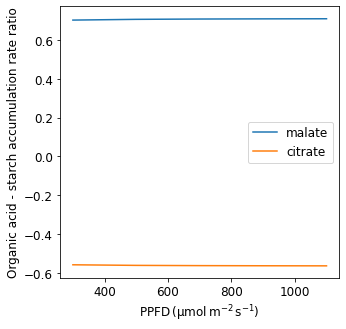

In [45]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(5,5))
plt.plot(xlist,ylist1,label="malate")
plt.plot(xlist,ylist2,label="citrate")
plt.ylabel("Organic acid - starch accumulation rate ratio")
plt.xlabel(r'$\mathrm{PPFD\/(\mu mol\/m^{-2}\/s^{-1})}$')
plt.legend()
plt.show()

In [46]:
sum(ylist1)/len(ylist1)

0.7068436197855117

In [47]:
sum(ylist2)/len(ylist2)

-0.5617486429844718